1.Выберите наборы данных. которые можно интерпретировать, как временные ряды:

а) зависимость цены на недвижимость в конкретном регионе от времени,

б) скорость полета самолета при перелете из аэропорта А в аэропорт В,

в) количество отказов компьютера,

г) число обращений в поликлинику по району,

д) координаты автобуса при движении по маршруту,

е) координаты фигуры нарушителя в файле видеофиксации охранной системы.

в) г) е)

2.Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 
import seaborn as sns

from sklearn.metrics import mean_squared_error

import os

In [3]:
data = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])

In [4]:
data.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
DUQ_MW    119068 non-null float64
dtypes: float64(1)
memory usage: 1.8 MB


In [6]:
data.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


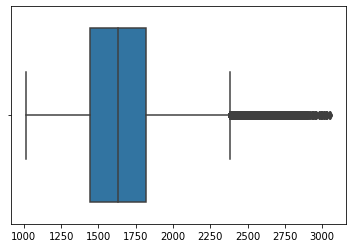

In [7]:
sns.boxplot(data.values)

In [10]:
# проверим пропуски
data['DUQ_MW'].isnull().sum()

0

Text(0, 0.5, 'МВт')

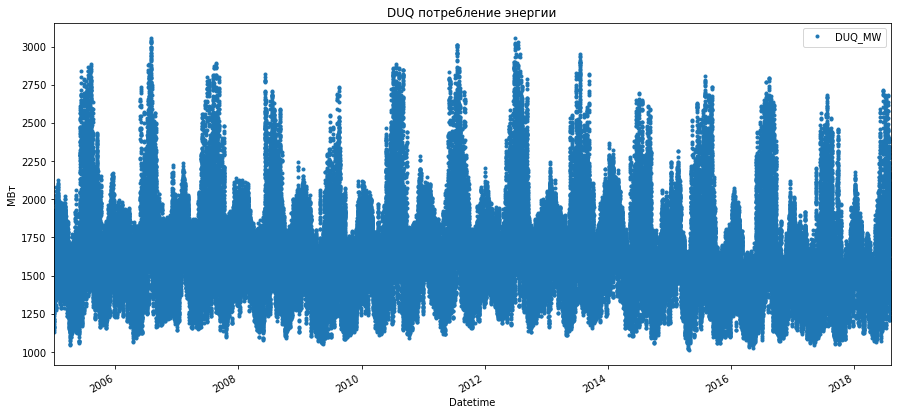

In [11]:
data.plot( style = '.', figsize = ( 15, 7 ), title = 'DUQ потребление энергии' )
plt.ylabel ( 'МВт' )

In [18]:
date_min = min(data.index)
date_max = max(data.index)
hours = (date_max - date_min).total_seconds() // 3600
hours

119087.0

In [20]:
data.shape[0] - hours

-19.0

Датасет представляет собой данные о потреблении электроэнергии с 2005-12-31 01:00:00 до 2018-01-02 00:00:00. В данных нет пропусков, но количество данных на 19 меньше, чем число часов в данном периоде

3.Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.

In [21]:
brent_data = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])
brent_data.head()

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59


In [24]:
brent_weekly = brent_data.resample("W").mean()

In [26]:
brent_monthly = brent_data.resample("M").mean()

4.Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

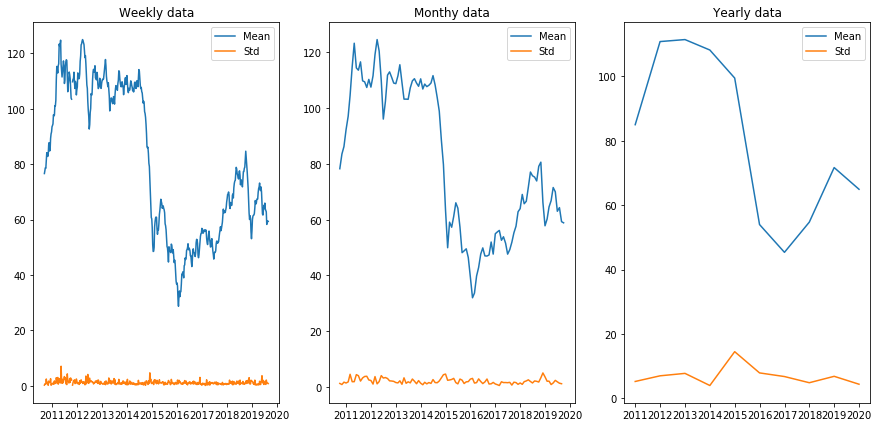

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches (15 , 7)

ax[0].plot(brent_data.resample("W").mean(), label='Mean')
ax[0].plot(brent_data.resample("W").std(), label='Std')
ax[0].set_title('Weekly data')
ax[0].legend()

ax[1].plot(brent_data.resample("M").mean(), label='Mean')
ax[1].plot(brent_data.resample("M").std(), label='Std')
ax[1].set_title('Monthy data')
ax[1].legend()

ax[2].plot(brent_data.resample("Y").mean(), label='Mean')
ax[2].plot(brent_data.resample("Y").std(), label='Std')
ax[2].set_title('Yearly data')
ax[2].legend()

5.Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.

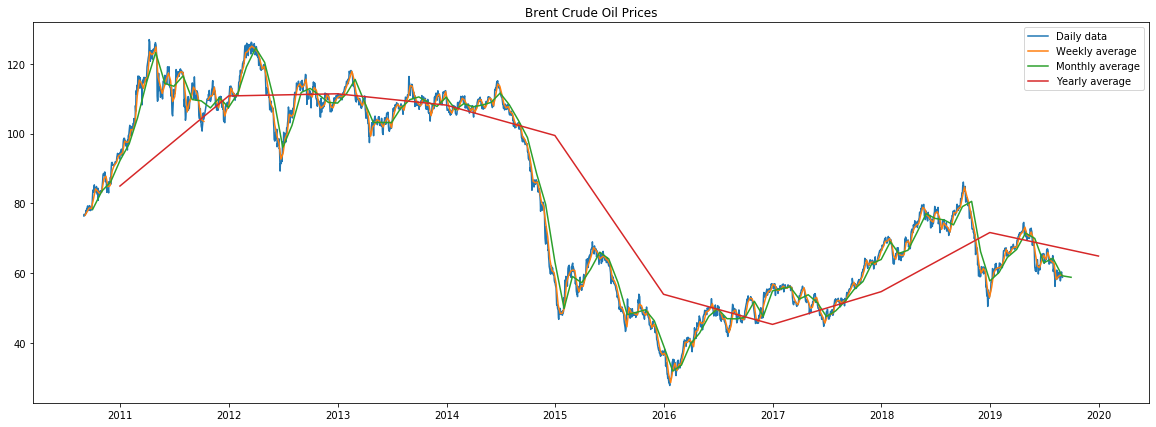

In [35]:
plt.figure(figsize=(20,7))

plt.plot(brent_data, label='Daily data')
plt.plot(brent_data.resample("W").mean(), label='Weekly average')
plt.plot(brent_data.resample("M").mean(), label='Monthly average')
plt.plot(brent_data.resample("Y").mean(), label='Yearly average')

plt.title('Brent Crude Oil Prices')
plt.legend()

Ресемплинг помогает снизить шум и увидеть долгосрочные тренды, который не виден на дневных данных